# Functions that plot networkx figures as atom types

This should work in an environment with current versions of foyer, mbuild, and gmso.

In [3]:
import networkx as nx
from gmso.external import convert_networkx
import matplotlib.pyplot as plt
def plot_networkx_atom_types(top):
    """
    This function is given a gmso.topology object. It will then 
    output the atom types shown on a networkx object
    
    """

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    networkx_graph = convert_networkx.to_networkx(top)

    pos={}
    for node in networkx_graph.nodes:
        pos[node] = node.position.value[0:2]

    layout = nx.drawing.layout.spring_layout(networkx_graph,k=.5,pos=pos)

    node_color_dict = {'C':'grey','H':'silver','O':'red','N':'blue','Cl':'green'}
    node_colors = []
    for node in networkx_graph.nodes:
        if node.name in list(node_color_dict.keys()):
            node_colors.append(node_color_dict[node.name])
        else:
            node_colors.append('black')

    nx.draw(networkx_graph,layout,ax,node_color=node_colors)
    #text_labels = (labels_from_wildcards(pos,labels))
    pos= {}
    labels = {}
    i=0
    for node in list(networkx_graph.nodes()):
        node.label = node.name + '\n' + node.atom_type.name
        #pos[node] = node.position.to_ndarray()[0:2]
        labels[node] = node.label 
        i+=1
    for atom,pos in layout.items():
        layout[atom] = pos + [0.09,0]
    nx.draw_networkx_labels(networkx_graph,layout,labels,horizontalalignment='left')
    ax.margins(.3,.3)
    plt.show()

In [4]:
from gmso.external import convert_networkx
import matplotlib.pyplot as plt
    
def plot_networkx_bond_types(top,atom_name1=None,atom_name2=None):
    #Color and weight edges between particular atoms. If both atom_names are none, plot missing bond types.
    
    """
    This function is given a gmso.topology object, and two atom names. These will 
    generally be the form of strings such as "C" for a carbon atom. It will then 
    output a networkx object highlighting bonds with those atoms. If no atom names are input,
    then it looks for bonds that are missing types (NoneType).
    
    """
    
    fig,ax = plt.subplots(1,1,figsize=(8,8))
    networkx_graph = convert_networkx.to_networkx(top)
    pos={}
    for node in networkx_graph.nodes:
        pos[node] = node.position.value[0:2]

    layout = nx.drawing.layout.spring_layout(networkx_graph,k=.5,pos=pos)

    node_color_dict = {'C':'grey','H':'silver','O':'red','N':'blue','Cl':'green'}
    node_colors = []
    for node in networkx_graph.nodes:
        node_colors.append(node_color_dict[node.name])

    edge_weights = {}
    edge_colors = {}
    mia_bond_ind = 0
    if atom_name1 and atom_name2:
        for edge in networkx_graph.edges:
            if edge[0].name == atom_name1 and edge[1].name == atom_name2:
                edge_weights[edge] = 5
                edge_colors[edge] = 'red'
            elif edge[0].name == atom_name2 and edge[1].name == atom_name1:
                edge_weights[edge] = 5
                edge_colors[edge] = 'red'
            else:
                edge_weights[edge] = 1
                edge_colors[edge] = 'k'
    elif atom_name1:
        for edge in networkx_graph.edges:
            if edge[0].name == atom_name1 or edge[1].name == atom_name1:
                edge_weights[edge] = 5
                edge_colors[edge] = 'red'
            else:
                edge_weights[edge] = 1
                edge_colors[edge] = 'k'
    else:
        for bond in list(networkx_graph.edges.items()):
            if bond[1]['connection'].bond_type == None:
                edge_weights[bond[0]] = 5
                edge_colors[bond[0]] = 'red'
                mia_bond_ind = 1
            else:
                edge_weights[bond[0]] = 1
                edge_colors[bond[0]] = 'k'
        if not mia_bond_ind:
            print('All bonds are typed')

    nx.draw(networkx_graph,layout,ax,node_color=node_colors,
            width=list(edge_weights.values()),edge_color=list(edge_colors.values()))
    #text_labels = (labels_from_wildcards(pos,labels))
    pos= {}
    labels = {}

    for node in list(networkx_graph.nodes()):
        node.label = node.name + '\n' + node.atom_type.name
        #pos[node] = node.position.to_ndarray()[0:2]
        labels[node] = node.label 

    for atom,pos in layout.items():
        layout[atom] = pos + [0.09,0]
    nx.draw_networkx_labels(networkx_graph,layout,labels,horizontalalignment='left')
    ax.margins(.3,.3)
    plt.show()

# Example of using the functions above

In [17]:
import molecule_parts
import mbuild as mb
import warnings 
warnings.filterwarnings('ignore')

#Build a molecule to type and visualize.
class AceticAcid(mb.Compound):
    def __init__(self):
        super(AceticAcid, self).__init__()
        CH3 = mb.lib.moieties.CH3()
        carb = molecule_parts.Carboxylate()
        carb.visualize(show_ports=True)
        self.add(carb)
        mb.force_overlap(CH3,CH3['up'],carb['anterior'],CH3)
        self.add(CH3)

In [20]:
import mbuild as mb 
import foyer 
import gmso 
from gmso.external import from_parmed

#Apply a foyer forcefield to this simple atom.
acetic_acid = AceticAcid()
oplsaa = foyer.Forcefield(name='oplsaa')
pmd_aa = oplsaa.apply(acetic_acid)

"""
#This will only run if you have the gmso visualize forcefield PR installed.
top = from_parmed(pmd_aa)
top.visualize()
"""
acetic_acid.visualize()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

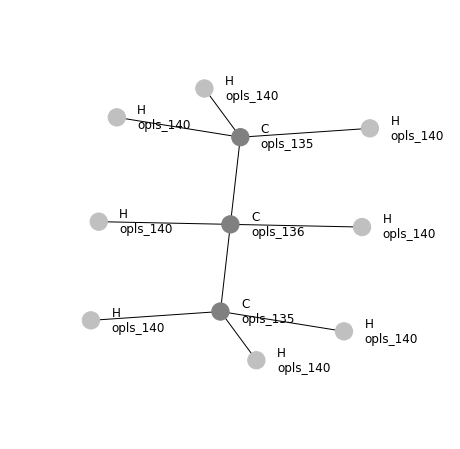

In [18]:
#Note, sometimes it's a little finicky and won't plot the figure the first time. Try running the cell again.
plot_networkx_atom_types(top)

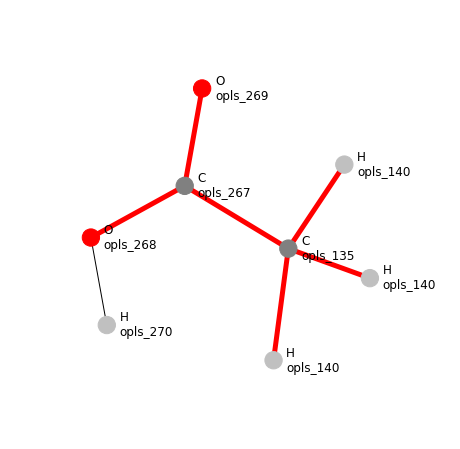

In [8]:
plot_networkx_bond_types(top,atom_name1 = 'C')

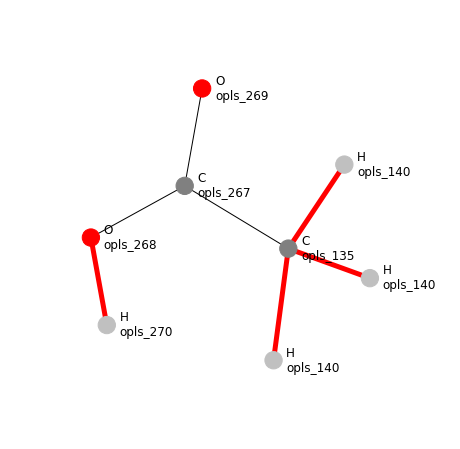

In [9]:
plot_networkx_bond_types(top,atom_name1 = 'H')

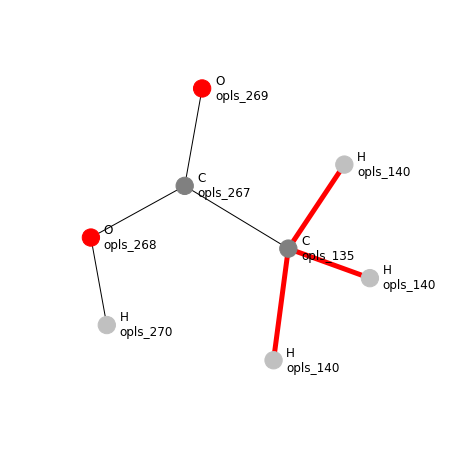

In [10]:
plot_networkx_bond_types(top,atom_name1 = 'C',atom_name2 = 'H')

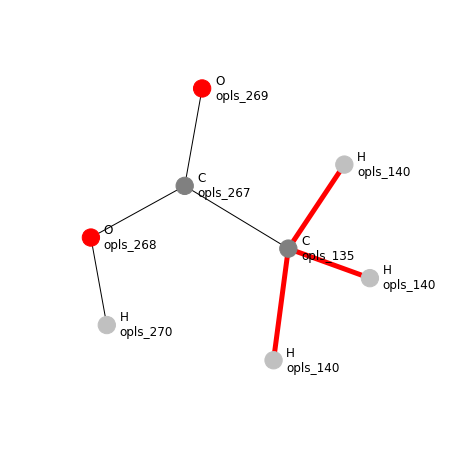

In [11]:
plot_networkx_bond_types(top,atom_name1 = 'H',atom_name2 = 'C')

All bonds are typed


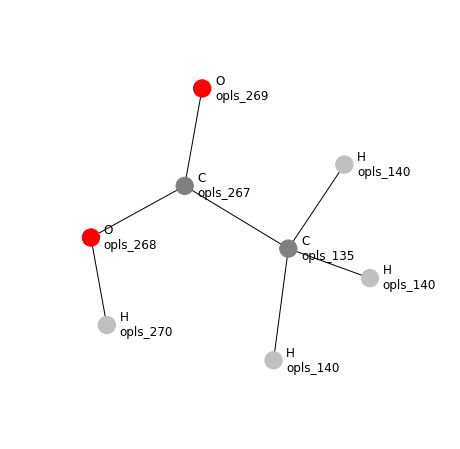

In [12]:
plot_networkx_bond_types(top)

In [13]:
#remove a bond type
i = 1 #index of bond type to remove
print(list(top.bonds)[i].bond_type)
list(top.bonds)[i].bond_type = None
print('\n\n')
print(list(top.bonds)[i].bond_type)

name_='BondType' potential_expression_=<PotentialExpression, expression: 0.5*k*(r - r_eq)**2, 1 independent variables> topology_=< 8 sites, 25 connections, id: 140467484268688> set_ref_='bond_type_dict' member_types_=None



None


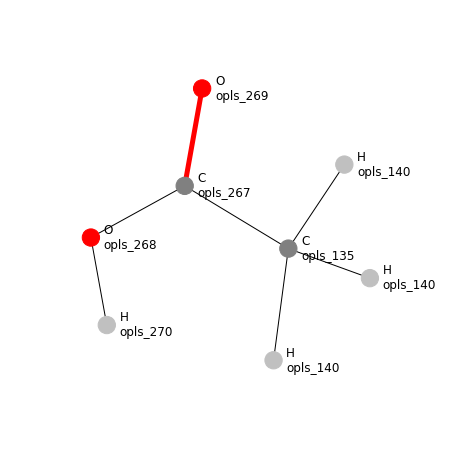

In [14]:
plot_networkx_bond_types(top)

In [19]:
from mbuild.lib.recipes import Alkane

mb_alkane = Alkane(n=3,cap_front=True,cap_end=True)
oplsaa = foyer.Forcefield(name='oplsaa')
pmd_propane = oplsaa.apply(mb_alkane)
top = from_parmed(pmd_propane)
color_scheme = {'C':'blue','H':'grey'}
"""
#Again this visualization won't work unless you have the gmso.topology.visualize() 
#method installed, which is not part of gmso yet. You can visualize using mbuild
top.visualize(color_scheme=color_scheme)
"""
mb_alkane.visualize(color_scheme=color_scheme)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

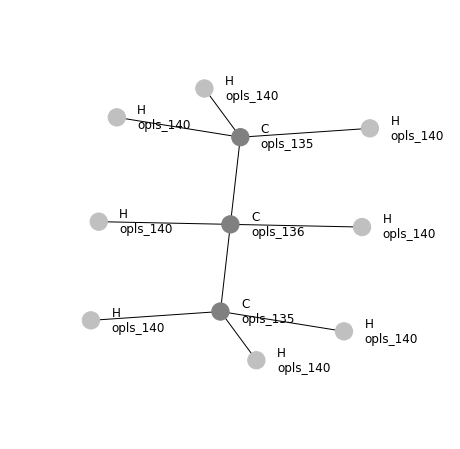

In [16]:
plot_networkx_atom_types(top)